# Morse theory-based transformations Stochastic Gradient Descent (SGD) - Eric Jiang

## The code for ADAM optimizer

In [1]:
import numpy as np

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, w, dw):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        w = w - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return w

# Generate random data
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Initialize parameters
m = 0.0
b = 0.0

# Create optimizer
optimizer_m = AdamOptimizer(learning_rate=0.1)
optimizer_b = AdamOptimizer(learning_rate=0.1)

# Training loop
for epoch in range(1000):
    # Predicted values
    y_pred = m * x + b
    # Compute gradients
    grad_m = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    # Update parameters
    m = optimizer_m.update(m, grad_m)
    b = optimizer_b.update(b, grad_b)

    if epoch % 100 == 0:
        loss = np.mean((y_pred - y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, m: {m:.4f}, b: {b:.4f}")

# Final parameters and loss
print(f"Final parameters - Slope: {m:.4f}, Intercept: {b:.4f}")


Epoch 0, Loss: 11.1166, m: 0.1000, b: 0.1000
Epoch 100, Loss: 0.2213, m: 1.9184, b: 2.9869
Epoch 200, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 300, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 400, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 500, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 600, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 700, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 800, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 900, Loss: 0.2209, m: 1.9284, b: 3.0037
Final parameters - Slope: 1.9284, Intercept: 3.0037


## The code for My Proposed Method: Morse theory-based transformations Stochastic Gradient Descent (SGD)

In [7]:
import numpy as np

np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Helper functions to compute gradient
def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def floer_homotopy_perturbation(params):
    perturbation_strength = 0.1
    perturbation = np.random.normal(0, perturbation_strength, size=params.shape)
    return perturbation

def classify_critical_point(gradient):
    norm_gradient = np.linalg.norm(gradient)
    if norm_gradient < 1e-5:
        return 'min'  # Assume local minimum if gradient norm is very small
    else:
        return 'saddle'  # Assume saddle otherwise

def J(u, gradient):
    critical_point_type = classify_critical_point(gradient)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient * alpha  # Simple modification for saddle points
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        floer_perturbation = floer_homotopy_perturbation(u)
        return gradient + beta * gradient + floer_perturbation
    else:
        return gradient

def update_parameters(params, gradient, learning_rate):
    modified_gradient = J(params, gradient)
    return params - learning_rate * modified_gradient

def SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate):
    params = initial_params
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        params = update_parameters(params, gradient, learning_rate)
        if i % 100 == 0:
            y_pred = params[0] * x + params[1]
            loss = np.mean((y_pred - y) ** 2)
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    return params

# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

# Run the SGD with Morse Theory-Based J(u)
print("SGD with Morse Theory-Based J(u):")
optimized_params = SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")


SGD with Morse Theory-Based J(u):
Iteration 0: params = [0.03850286 0.08410378], Loss = 10.5539
Iteration 100: params = [1.70897522 2.81765533], Loss = 0.2869
Iteration 200: params = [1.906028   2.98983317], Loss = 0.2214
Iteration 300: params = [1.92619959 3.00255615], Loss = 0.2209
Iteration 400: params = [1.92816423 3.00361105], Loss = 0.2209
Iteration 500: params = [1.92835181 3.00370448], Loss = 0.2209
Iteration 600: params = [1.92823563 3.00356274], Loss = 0.2209
Iteration 700: params = [1.92835685 3.00370351], Loss = 0.2209
Iteration 800: params = [1.92805376 3.00347069], Loss = 0.2209
Iteration 900: params = [1.9283396  3.00369514], Loss = 0.2209
Optimized parameters: [1.92916104 3.00421953]


## Comparison Test Code: (Morse Theory SDG vs. Adam)

SGD with Morse Theory-Based J(u):
Iteration 0: params = [0.03850286 0.08410378], Loss = 10.5539
Iteration 100: params = [1.70897522 2.81765533], Loss = 0.2869
Iteration 200: params = [1.906028   2.98983317], Loss = 0.2214
Iteration 300: params = [1.92619959 3.00255615], Loss = 0.2209
Iteration 400: params = [1.92816423 3.00361105], Loss = 0.2209
Iteration 500: params = [1.92835181 3.00370448], Loss = 0.2209
Iteration 600: params = [1.92823563 3.00356274], Loss = 0.2209
Iteration 700: params = [1.92835685 3.00370351], Loss = 0.2209
Iteration 800: params = [1.92805376 3.00347069], Loss = 0.2209
Iteration 900: params = [1.9283396  3.00369514], Loss = 0.2209
Optimized parameters: [1.92916104 3.00421953]

Adam Optimizer:
Epoch 0, Loss: 11.1166, m: 0.1000, b: 0.1000
Epoch 100, Loss: 0.2213, m: 1.9184, b: 2.9869
Epoch 200, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 300, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 400, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 500, Loss: 0.2209, m: 1.9284, b: 3.0037

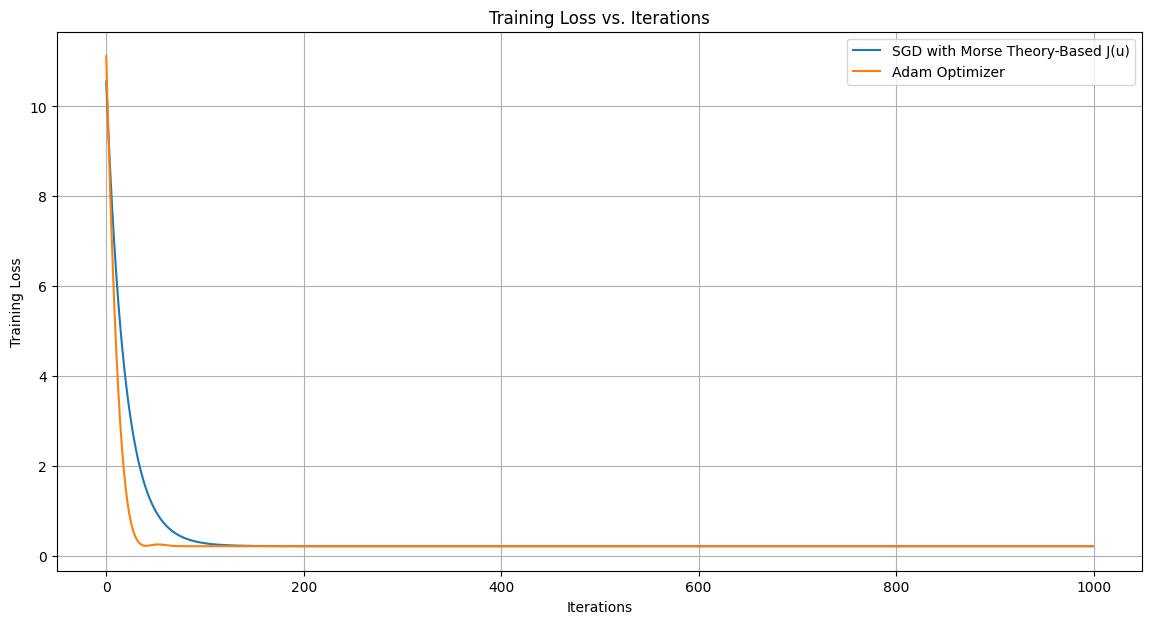

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Helper functions to compute gradient
def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def floer_homotopy_perturbation(params):
    perturbation_strength = 0.1
    perturbation = np.random.normal(0, perturbation_strength, size=params.shape)
    return perturbation

def classify_critical_point(gradient):
    norm_gradient = np.linalg.norm(gradient)
    if norm_gradient < 1e-5:
        return 'min'  # Assume local minimum if gradient norm is very small
    else:
        return 'saddle'  # Assume saddle otherwise

def J(u, gradient):
    critical_point_type = classify_critical_point(gradient)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient * alpha  # Simple modification for saddle points
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        floer_perturbation = floer_homotopy_perturbation(u)
        return gradient + beta * gradient + floer_perturbation
    else:
        return gradient

def update_parameters(params, gradient, learning_rate):
    modified_gradient = J(params, gradient)
    return params - learning_rate * modified_gradient

def SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate):
    params = initial_params
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        params = update_parameters(params, gradient, learning_rate)
        y_pred = params[0] * x + params[1]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    return params, losses

# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

# Run the SGD with Morse Theory-Based J(u)
print("SGD with Morse Theory-Based J(u):")
optimized_params, losses_sgd_morse = SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")

# Adam Optimizer Class
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, w, dw):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        w = w - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return w

print("\nAdam Optimizer:")
# Initialize parameters
m = 0.0
b = 0.0

# Create optimizer
optimizer_m = AdamOptimizer(learning_rate=0.1)
optimizer_b = AdamOptimizer(learning_rate=0.1)

# Training loop
losses_adam = []
for epoch in range(1000):
    # Predicted values
    y_pred = m * x + b
    # Compute gradients
    grad_m = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    # Update parameters
    m = optimizer_m.update(m, grad_m)
    b = optimizer_b.update(b, grad_b)
    
    loss = np.mean((y_pred - y) ** 2)
    losses_adam.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, m: {m:.4f}, b: {b:.4f}")

# Final parameters and loss
print(f"Final parameters - Slope: {m:.4f}, Intercept: {b:.4f}")

# Plotting the training losses
plt.figure(figsize=(14, 7))
plt.plot(losses_sgd_morse, label="SGD with Morse Theory-Based J(u)")
plt.plot(losses_adam, label="Adam Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()



## Morse Theory and Floer Homotopy with Adam and comparison with Adam

Adam with Morse Theory and Floer Homotopy:
Iteration 0: params = [0.015 0.015], Loss = 10.9944
Iteration 100: params = [1.2371888  1.36948233], Loss = 3.0523
Iteration 200: params = [1.73645969 2.27915221], Loss = 0.7475
Iteration 300: params = [1.87387155 2.75192817], Loss = 0.2839
Iteration 400: params = [1.91406955 2.93588369], Loss = 0.2255
Iteration 500: params = [1.92539725 2.98959946], Loss = 0.2211
Iteration 600: params = [1.92789758 3.00146523], Loss = 0.2209
Iteration 700: params = [1.92831457 3.0034441 ], Loss = 0.2209
Iteration 800: params = [1.92836641 3.00369015], Loss = 0.2209
Iteration 900: params = [1.9282058  3.00345807], Loss = 0.2209
Optimized parameters: [1.92836785 3.0037015 ]

Original Adam Optimizer:
Epoch 0, Loss: 11.0350, params: [0.01 0.01]
Epoch 100, Loss: 4.8868, params: [0.89495467 0.94859528]
Epoch 200, Loss: 1.9740, params: [1.44741132 1.70307912]
Epoch 300, Loss: 0.7847, params: [1.72061793 2.25512041]
Epoch 400, Loss: 0.3707, params: [1.83848878 2.6159

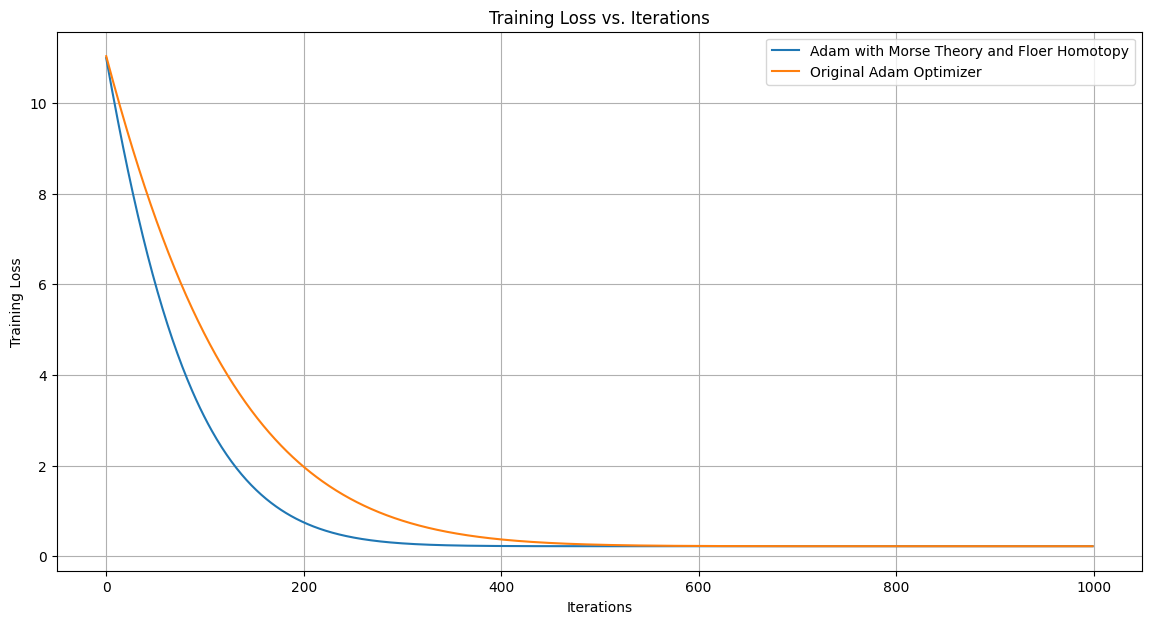

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Helper functions to compute gradient
def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def floer_homotopy_perturbation(params):
    perturbation_strength = 0.1
    perturbation = np.random.normal(0, perturbation_strength, size=params.shape)
    return perturbation

def classify_critical_point(gradient):
    norm_gradient = np.linalg.norm(gradient)
    if norm_gradient < 1e-5:
        return 'min'  # Assume local minimum if gradient norm is very small
    else:
        return 'saddle'  # Assume saddle otherwise

def J(u, gradient):
    critical_point_type = classify_critical_point(gradient)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient * alpha  # Simple modification for saddle points
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        floer_perturbation = floer_homotopy_perturbation(u)
        return gradient + beta * gradient + floer_perturbation
    else:
        return gradient

class AdamOptimizerWithMorse:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad, u):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        modified_gradient = J(u, m_hat)
        
        params = params - self.learning_rate * modified_gradient / (np.sqrt(v_hat) + self.epsilon)
        return params

def SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate):
    optimizer = AdamOptimizerWithMorse(learning_rate=learning_rate)
    params = initial_params
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        params = optimizer.update(params, gradient, params)
        y_pred = params[0] * x + params[1]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    return params, losses

# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

# Run the combined Adam with Morse Theory and Floer Homotopy
print("Adam with Morse Theory and Floer Homotopy:")
optimized_params, losses_adam_morse = SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")

# Original Adam Optimizer for comparison
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params

print("\nOriginal Adam Optimizer:")
# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])

# Create optimizer
optimizer = AdamOptimizer(learning_rate=0.01)

# Training loop
params = initial_params
losses_adam = []
for epoch in range(1000):
    # Compute gradients
    gradient = compute_gradient(params, x, y)
    # Update parameters
    params = optimizer.update(params, gradient)
    
    # Predicted values
    y_pred = params[0] * x + params[1]
    loss = np.mean((y_pred - y) ** 2)
    losses_adam.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, params: {params}")

# Final parameters and loss
print(f"Final parameters: {params}")

# Plotting the training losses
plt.figure(figsize=(14, 7))
plt.plot(losses_adam_morse, label="Adam with Morse Theory and Floer Homotopy")
plt.plot(losses_adam, label="Original Adam Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()


Adam with Morse Theory and Floer Homotopy:
Iteration 0: params = [0.015 0.015], Loss = 10.9944
Iteration 100: params = [1.2371888  1.36948233], Loss = 3.0523
Iteration 200: params = [1.73645969 2.27915221], Loss = 0.7475
Iteration 300: params = [1.87387155 2.75192817], Loss = 0.2839
Iteration 400: params = [1.91406955 2.93588369], Loss = 0.2255
Iteration 500: params = [1.92539725 2.98959946], Loss = 0.2211
Iteration 600: params = [1.92789758 3.00146523], Loss = 0.2209
Iteration 700: params = [1.92831457 3.0034441 ], Loss = 0.2209
Iteration 800: params = [1.92836641 3.00369015], Loss = 0.2209
Iteration 900: params = [1.9282058  3.00345807], Loss = 0.2209
Optimized parameters: [1.92836785 3.0037015 ]

Original Adam Optimizer:
Epoch 0, Loss: 11.0350, params: [0.01 0.01]
Epoch 100, Loss: 4.8868, params: [0.89495467 0.94859528]
Epoch 200, Loss: 1.9740, params: [1.44741132 1.70307912]
Epoch 300, Loss: 0.7847, params: [1.72061793 2.25512041]
Epoch 400, Loss: 0.3707, params: [1.83848878 2.6159

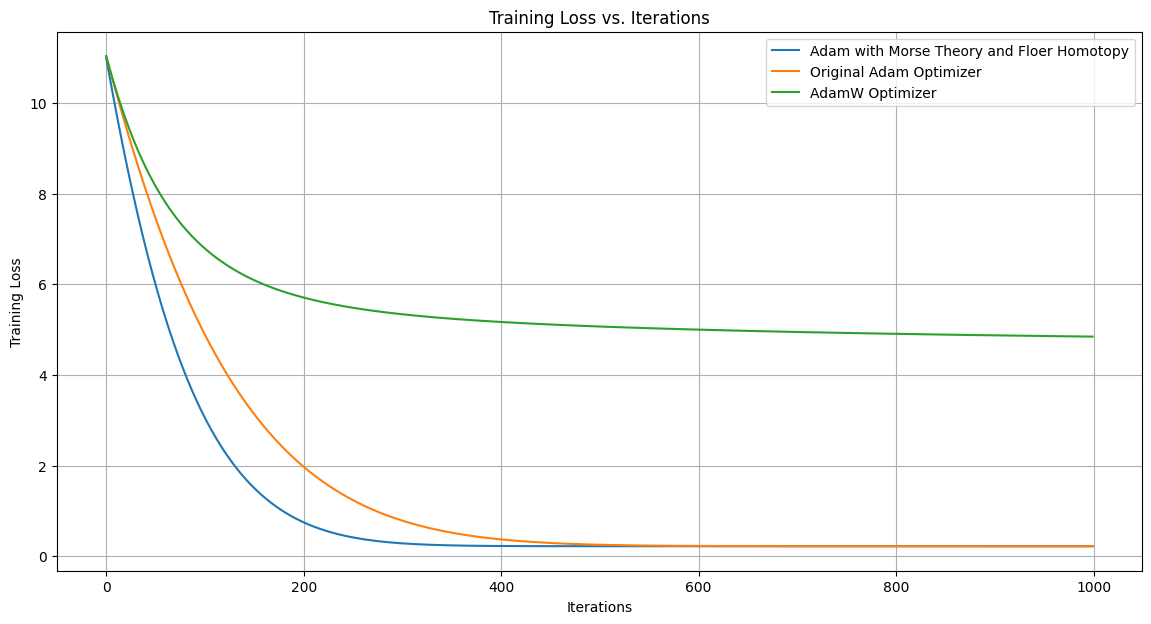

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Helper functions to compute gradient
def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def floer_homotopy_perturbation(params):
    perturbation_strength = 0.1
    perturbation = np.random.normal(0, perturbation_strength, size=params.shape)
    return perturbation

def classify_critical_point(gradient):
    norm_gradient = np.linalg.norm(gradient)
    if norm_gradient < 1e-5:
        return 'min'  # Assume local minimum if gradient norm is very small
    else:
        return 'saddle'  # Assume saddle otherwise

def J(u, gradient):
    critical_point_type = classify_critical_point(gradient)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient * alpha  # Simple modification for saddle points
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        floer_perturbation = floer_homotopy_perturbation(u)
        return gradient + beta * gradient + floer_perturbation
    else:
        return gradient

class AdamOptimizerWithMorse:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad, u):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        modified_gradient = J(u, m_hat)
        
        params = params - self.learning_rate * modified_gradient / (np.sqrt(v_hat) + self.epsilon)
        return params

def SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate):
    optimizer = AdamOptimizerWithMorse(learning_rate=learning_rate)
    params = initial_params
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        params = optimizer.update(params, gradient, params)
        y_pred = params[0] * x + params[1]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    return params, losses

# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

# Run the combined Adam with Morse Theory and Floer Homotopy
print("Adam with Morse Theory and Floer Homotopy:")
optimized_params, losses_adam_morse = SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")

# Original Adam Optimizer for comparison
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params

print("\nOriginal Adam Optimizer:")
# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])

# Create optimizer
optimizer = AdamOptimizer(learning_rate=0.01)

# Training loop
params = initial_params
losses_adam = []
for epoch in range(1000):
    # Compute gradients
    gradient = compute_gradient(params, x, y)
    # Update parameters
    params = optimizer.update(params, gradient)
    
    # Predicted values
    y_pred = params[0] * x + params[1]
    loss = np.mean((y_pred - y) ** 2)
    losses_adam.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, params: {params}")

# Final parameters and loss
print(f"Final parameters: {params}")

# AdamW Optimizer for comparison
class AdamWOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.weight_decay = weight_decay
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon) - self.weight_decay * params
        return params

print("\nAdamW Optimizer:")
# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])

# Create optimizer
optimizer_w = AdamWOptimizer(learning_rate=0.01)

# Training loop
params = initial_params
losses_adamw = []
for epoch in range(1000):
    # Compute gradients
    gradient = compute_gradient(params, x, y)
    # Update parameters
    params = optimizer_w.update(params, gradient)
    
    # Predicted values
    y_pred = params[0] * x + params[1]
    loss = np.mean((y_pred - y) ** 2)
    losses_adamw.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, params: {params}")

# Final parameters and loss
print(f"Final parameters: {params}")

# Plotting the training losses
plt.figure(figsize=(14, 7))
plt.plot(losses_adam_morse, label="Adam with Morse Theory and Floer Homotopy")
plt.plot(losses_adam, label="Original Adam Optimizer")
plt.plot(losses_adamw, label="AdamW Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()


Adam with Morse Theory and Floer Homotopy:
Iteration 0: params = [0.015 0.015], Loss = 10.9944
Iteration 100: params = [1.2371888  1.36948233], Loss = 3.0523
Iteration 200: params = [1.73645969 2.27915221], Loss = 0.7475
Iteration 300: params = [1.87387155 2.75192817], Loss = 0.2839
Iteration 400: params = [1.91406955 2.93588369], Loss = 0.2255
Iteration 500: params = [1.92539725 2.98959946], Loss = 0.2211
Iteration 600: params = [1.92789758 3.00146523], Loss = 0.2209
Iteration 700: params = [1.92831457 3.0034441 ], Loss = 0.2209
Iteration 800: params = [1.92836641 3.00369015], Loss = 0.2209
Iteration 900: params = [1.9282058  3.00345807], Loss = 0.2209
Time taken for Adam with Morse Theory and Floer Homotopy: 0.0873 seconds
Optimized parameters: [1.92836785 3.0037015 ]

Original Adam Optimizer:
Epoch 0, Loss: 11.0350, params: [0.01 0.01]
Epoch 100, Loss: 4.8868, params: [0.89495467 0.94859528]
Epoch 200, Loss: 1.9740, params: [1.44741132 1.70307912]
Epoch 300, Loss: 0.7847, params: [1

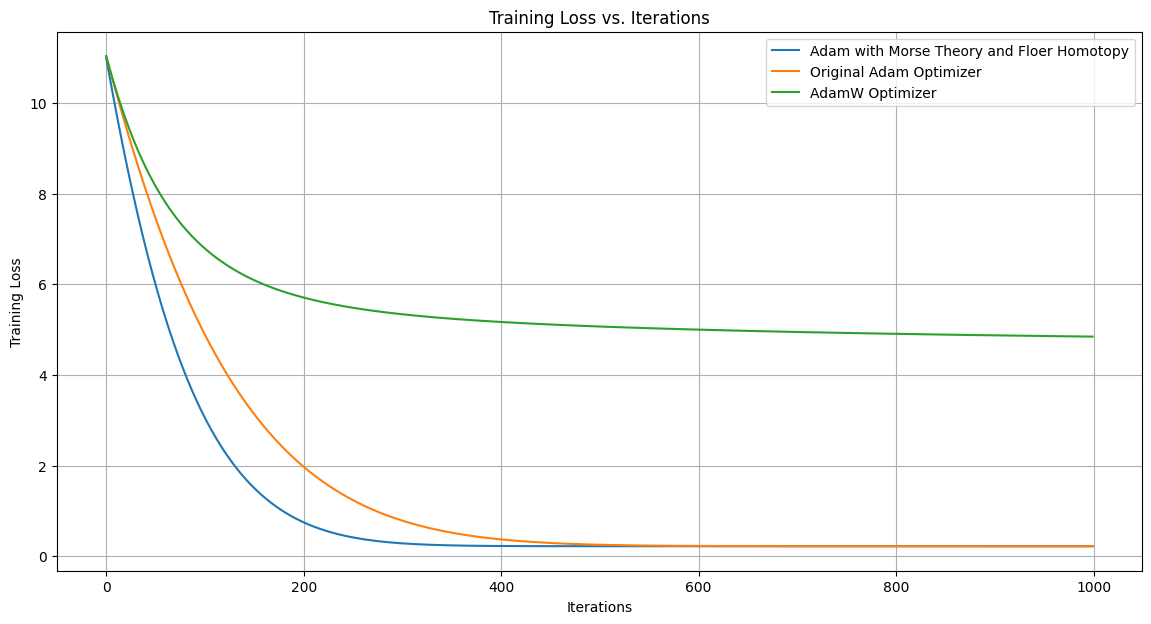

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Seed for reproducibility
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Helper functions to compute gradient
def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def floer_homotopy_perturbation(params):
    perturbation_strength = 0.1
    perturbation = np.random.normal(0, perturbation_strength, size=params.shape)
    return perturbation

def classify_critical_point(gradient):
    norm_gradient = np.linalg.norm(gradient)
    if norm_gradient < 1e-5:
        return 'min'  # Assume local minimum if gradient norm is very small
    else:
        return 'saddle'  # Assume saddle otherwise

def J(u, gradient):
    critical_point_type = classify_critical_point(gradient)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient * alpha  # Simple modification for saddle points
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        floer_perturbation = floer_homotopy_perturbation(u)
        return gradient + beta * gradient + floer_perturbation
    else:
        return gradient

class AdamOptimizerWithMorse:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad, u):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        modified_gradient = J(u, m_hat)
        
        params = params - self.learning_rate * modified_gradient / (np.sqrt(v_hat) + self.epsilon)
        return params

def SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate):
    optimizer = AdamOptimizerWithMorse(learning_rate=learning_rate)
    params = initial_params
    losses = []
    start_time = time.time()
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        params = optimizer.update(params, gradient, params)
        y_pred = params[0] * x + params[1]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    end_time = time.time()
    duration = end_time - start_time
    print(f"Time taken for Adam with Morse Theory and Floer Homotopy: {duration:.4f} seconds")
    return params, losses, duration

# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

# Run the combined Adam with Morse Theory and Floer Homotopy
print("Adam with Morse Theory and Floer Homotopy:")
optimized_params, losses_adam_morse, time_adam_morse = SGD_with_Adam_Morse(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")

# Original Adam Optimizer for comparison
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params

print("\nOriginal Adam Optimizer:")
# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])

# Create optimizer
optimizer = AdamOptimizer(learning_rate=0.01)

# Training loop
params = initial_params
losses_adam = []
start_time = time.time()
for epoch in range(1000):
    # Compute gradients
    gradient = compute_gradient(params, x, y)
    # Update parameters
    params = optimizer.update(params, gradient)
    
    # Predicted values
    y_pred = params[0] * x + params[1]
    loss = np.mean((y_pred - y) ** 2)
    losses_adam.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, params: {params}")
end_time = time.time()
duration_adam = end_time - start_time
print(f"Time taken for Original Adam Optimizer: {duration_adam:.4f} seconds")

# Final parameters and loss
print(f"Final parameters: {params}")

# AdamW Optimizer for comparison
class AdamWOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.weight_decay = weight_decay
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grad):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon) - self.weight_decay * params
        return params

print("\nAdamW Optimizer:")
# Initial parameters (slope, intercept)
initial_params = np.array([0.0, 0.0])

# Create optimizer
optimizer_w = AdamWOptimizer(learning_rate=0.01)

# Training loop
params = initial_params
losses_adamw = []
start_time = time.time()
for epoch in range(1000):
    # Compute gradients
    gradient = compute_gradient(params, x, y)
    # Update parameters
    params = optimizer_w.update(params, gradient)
    
    # Predicted values
    y_pred = params[0] * x + params[1]
    loss = np.mean((y_pred - y) ** 2)
    losses_adamw.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, params: {params}")
end_time = time.time()
duration_adamw = end_time - start_time
print(f"Time taken for AdamW Optimizer: {duration_adamw:.4f} seconds")

# Final parameters and loss
print(f"Final parameters: {params}")

# Plotting the training losses
plt.figure(figsize=(14, 7))
plt.plot(losses_adam_morse, label="Adam with Morse Theory and Floer Homotopy")
plt.plot(losses_adam, label="Original Adam Optimizer")
plt.plot(losses_adamw, label="AdamW Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=756a2cf6-30bf-4d75-a01b-fc300f6f9700' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>